In [53]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
# from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
# from langchain_openai import ChatOpenAI
from pydantic import BaseModel
import random
from loguru import logger

In [54]:
# Some useful constants
nouns = ["Cabbages", "Unicorns", "Toasters", "Penguins", "Bananas", "Zombies", "Rainbows", "Eels", "Pickles", "Muffins"]
adjectives = ["outrageous", "smelly", "pedantic", "existential", "moody", "sparkly", "untrustworthy", "sarcastic", "squishy", "haunted"]

## 1- Define State 

In [55]:
class State(BaseModel):        
    messages: Annotated[list, add_messages]

## 2- Build State Graph 

In [56]:
graph_builder=StateGraph(State)

## 3- Create Node

In [57]:
def our_first_node(old_state: State) -> State:

    reply = f"{random.choice(nouns)} are {random.choice(adjectives)}"
    messages = [{"role": "assistant", "content": reply}]

    new_state = State(messages=messages)

    return new_state

In [58]:
graph_builder.add_node("first_node", our_first_node)

# 4-Create Edges

In [59]:
graph_builder.add_edge(START, "first_node")
graph_builder.add_edge("first_node", END)

# 5- Compliling Graph

In [60]:
graph = graph_builder.compile()

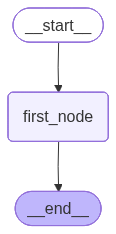

In [61]:
graph

# That's it! Showtime....

In [80]:
def chat(user_input, history):
    msg={"role":"user", "content":user_input} 
    messages=[msg]
    state=State(messages=messages)
    result=graph.invoke(state)
    logger.info(result)

    return result["messages"][-1].content

In [81]:
gr.ChatInterface(chat,type="messages").launch()

* Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.


2025-10-25 10:08:18.863 | INFO     | __main__:chat:6 - {'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='73444e3e-631e-445c-acfc-42f15d72ce4a'), AIMessage(content='Zombies are squishy', additional_kwargs={}, response_metadata={}, id='02915da4-578b-4447-88d6-5af08878d892')]}


In [1]:
# Step-2: Define the State object
class State(BaseModel):
    messages: Annotated[list,add_messages]

NameError: name 'BaseModel' is not defined

In [ ]:
# Step 2: Start Graph Builder with the State
graph_builder=StateGraph(state_schema=State)

In [ ]:
# Step 3: Create Nodes
llm =Chat